## **PROJET INFO-F422**

L'objectif principal est de développer des modèles de régression capables de prédire les angles continus d'articulation de la main (51 valeurs) à partir de signaux d'électromyographie de surface (SEMG) enregistrés sur l'avant-bras d'un participant. Le projet utilise deux ensembles de données : un pour des gestes guidés prédéfinis et un autre pour des gestes libres et naturels.

**PLAN:**


1.   Explorer les données
2.   Faire du data processing



Types de données:


*   Signaux SEMG (Surface Electromyography) bruts : Ce sont les données
d'entrée principales. Elles proviennent de **8 capteurs** sans fil placés sur l'avant-bras du participant et mesurent l'activité électrique des muscles. Les signaux SEMG, qui constituent vos données d'entrée (souvent notées X ou x_t), représentent les potentiels électriques, c'est-à-dire le voltage, généré par l'activité musculaire de l'avant-bras, mesuré par 8 électrodes. Ces mesures de voltage sont prises à une fréquence élevée de 1024 Hz, fournissant ainsi 1024 échantillons par seconde pour chaque électrode.

* Angles d'Articulation de la Main (Hand Pose) : Ce sont les données cibles (à prédire). Elles consistent en **51 valeurs continues** représentant les angles de 17 articulations de la main, capturées par un casque VR (Oculus Quest).

## Shapes des Données (Format Fichiers .npy)

Basé sur le document du projet:

### 1. Données "Guided Gestures"

* **`guided_dataset_X.npy`** (Entrée Entraînement/Validation - SEMG):
    * **Shape**: `(5, 8, 230000)`
    * *Dimensions*: (session, électrode, temps)
* **`guided_dataset_y.npy`** (Cible Entraînement/Validation - Pose):
    * **Shape**: `(5, 51, 230000)`
    * *Dimensions*: (session, angle articulaire, temps)
* **`guided_testset_X.npy`** (Entrée Test - SEMG):
    * **Shape**: `(5, 332, 8, 500)`
    * *Dimensions*: (session, fenêtre, électrode, temps dans la fenêtre)

### 2. Données "Free Gestures"

* **`freemoves_dataset_X.npy`** (Entrée Entraînement/Validation - SEMG):
    * **Shape**: `(5, 8, 270000)`
    * *Dimensions*: (session, électrode, temps)
* **`freemoves_dataset_y.npy`** (Cible Entraînement/Validation - Pose):
    * **Shape**: `(5, 51, 270000)`
    * *Dimensions*: (session, angle articulaire, temps)
* **`freemoves_testset_X.npy`** (Entrée Test - SEMG):
    * **Shape**: `(5, 308, 8, 500)`
    * *Dimensions*: (session, fenêtre, électrode, temps dans la fenêtre)

### 3. Shapes Attendues pour la Soumission

* Prédictions pour `guided_testset_X.npy`: **`(1660, 51)`**
* Prédictions pour `freemoves_testset_X.npy`: **`(1540, 51)`**
* Fichier `.csv` final (concaténé): **`(3200, 51)`**

In [2]:
# PATH TO DATA
import numpy as np
user_path = {}
user_path['N'] = ['/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/guided/guided_dataset_X.npy',
               '/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/guided/guided_dataset_y.npy']
user_path['B'] = ['guided/guided_dataset_X.npy',
'guided/guided_dataset_y.npy']

file_pathX = user_path["B"][0]
file_pathY = user_path["B"][1]

# Verification of the files

try:
    dataX = np.load(file_pathX)
    print("Shape of dataX:", dataX.shape)
except FileNotFoundError:
    print(f"Error: File not found at {file_pathX}. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading dataX: {e}")

# Chargement de y
try:
    dataY = np.load(file_pathY)
    print("Shape of dataY:", dataY.shape)
except FileNotFoundError:
    print(f"Error: File not found at {file_pathY}. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading dataY: {e}")



Shape of dataX: (5, 8, 230000)
Shape of dataY: (5, 51, 230000)


In [3]:
# LOAD INPUT DATA
import pandas as pd

# Store the data in a dictionary for easy access
data = {
    'X': {},  # EMG data
    'y': {}   # Labels
}
# Explore the different sessions in the dataset
for session in range(dataX.shape[0]):
    # Store the session data 
    session_data = dataX[session] # Shape will be (8, 230000) for this session

    # Transpose the data: time points become rows, electrodes become columns
    session_input = session_data.T # Shape becomes (230000, 8)

    # Define column names for the EMG electrodes (should be 8 columns)
    electrode_columns = [f'EMG_{i+1}' for i in range(session_data.shape[0])] # Use session_data shape for columns

    # Create a pandas DataFrame for the *first 10 time points* of the transposed data
    # This is just for display purposes to avoid printing huge tables.
    data['X'][session] = pd.DataFrame(session_input, columns=electrode_columns)

    # Add a 'Time_Sample' index name for clarity
    data['X'][session].index.name = 'Time_Sample'

    # Retake the right format for the data
    data['X'][session] = data['X'][session].T

    data['X'][session] = data['X'][session] # Store the DataFrame back in the dictionary
    
# Display the first 10 time points for the selected session
#print(f"\nFirst 10 time points for Session {session_index + 1}:")
print(data['X'][0])    
#print("-" * 30)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\bryan\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\bryan\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\bryan\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\bryan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\bryan\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Time_Sample     0          1          2          3          4          5       \
EMG_1         1.447503  11.448849  10.966602  -0.372605  -1.220629  -1.395730   
EMG_2        -2.519842 -27.137169 -25.669575  -9.807298   7.147789  10.744989   
EMG_3        -3.431548  13.042309  30.187789   8.831421  -7.101316   3.253534   
EMG_4       -14.551101  12.344713  17.807764  19.798811   1.545637   1.535868   
EMG_5         9.008999  -5.894418  -1.391771 -11.487393   3.036702  -6.069433   
EMG_6        -6.128061  -8.286748  -0.596492  -2.230163 -13.426975 -12.943470   
EMG_7         6.585124  -6.818692   8.883394  -1.178838  -3.173392   4.974815   
EMG_8         8.032713  14.307336   8.021251   3.123762   6.136862   7.669919   

Time_Sample    6          7          8         9       ...     229990  \
EMG_1       -2.202977  -2.100518  -2.192419 -5.772013  ... -26.529012   
EMG_2        6.184262  11.659288   3.068883  4.933054  ...  26.643876   
EMG_3        8.019242  15.551035   5.323104 -9.3230

In [4]:
# LOAD OUTPUT DATA

for session in range(dataX.shape[0]):

    # Store the session data
    session_data = dataY[session]  

    # Transpose the data: time points become rows, electrodes become columns
    session_output = session_data.T 

    # Define column names for the different positions 
    position_columns = [f'Position_{i+1}' for i in range(session_output.shape[1])]

    print (f"Session {session} shape: {session_output.shape}")
    # Transform the session data into a pandas DataFrame
    df_output = pd.DataFrame(session_output, columns=position_columns)

    # Add a 'Time_Sample' index name for clarity
    df_output.index.name = 'Time_Sample'

    # Retake the right format for the data
    df_output = df_output.T

    # Store the DataFrame back in the dictionary
    data['y'][session] = df_output

# Display the first 10 time points for the selected session
#print(f"\nFirst 10 time points for Session {session_index + 1}:")
print(data['y'][0])
#print("-" * 30)



Session 0 shape: (230000, 51)
Session 1 shape: (230000, 51)
Session 2 shape: (230000, 51)
Session 3 shape: (230000, 51)
Session 4 shape: (230000, 51)
Time_Sample     0          1          2          3          4          5       \
Position_1   42.555831  42.553880  42.552095  42.550542  42.549171  42.547960   
Position_2  -65.658641 -65.656544 -65.654588 -65.652847 -65.651273 -65.649848   
Position_3  -36.766674 -36.758701 -36.751351 -36.744879 -36.739104 -36.733935   
Position_4   29.562305  29.558308  29.554308  29.550309  29.546320  29.542347   
Position_5   -6.883659  -6.906019  -6.928427  -6.950878  -6.973312  -6.995679   
Position_6  -16.659136 -16.670179 -16.681247 -16.692339 -16.703424 -16.714478   
Position_7   -7.239894  -7.240577  -7.241262  -7.241950  -7.242642  -7.243337   
Position_8    7.365142   7.365649   7.366157   7.366667   7.367180   7.367695   
Position_9  -36.340163 -36.327813 -36.315418 -36.302963 -36.290441 -36.277853   
Position_10   8.975887   8.976946   8.97

# Extract the windows

The input data being huge it is therefor necessary to reduce the quantity of data to train our models. Even more some new features could better link the dfiferents informations in the data.

First, as said in the documentation , we split the data in windows of size 500. An overlapping is add in order to produce more data from the input.

In [ ]:
# Here we extract the windows of 500 elements and check if the overlapping step is correct
def extract_window(index_window , size_data, overlapping_step, overlap_vec1, overlap_vec2):
    start_wnd = int(index_window * 500)
    end_wnd = start_wnd + 500
    if end_wnd > size_data:
        return None, None, None
    if index_window > 0:
        start_wnd -= 1
    window_data = data['X'][session].iloc[:, start_wnd:end_wnd]
    # Check the orverlapping step 
    if index_window == 0:
        overlap_vec1 = window_data[99]
    elif index_window == overlapping_step:
        overlap_vec2 = window_data[99]
        if overlap_vec1.equals(overlap_vec2):
            print(f"The overlapping step is correct for session {session}. The {500*overlapping_step}th column of the first window is equal to the 0th column of the second window.")
        else:
            raise ValueError(f"The overlapping step is incorrect for session {session}. The {500*overlapping_step}th column of the first window is not equal to the 0th column of the second window.")
    return window_data, overlap_vec1, overlap_vec2
    

In [34]:
# Pourcentage of overlapping between the windows
OVERLAPPING = 0.8  
# Number of iterations for the windowing process before the overlapping
N_of_iter = (data['X'][session].shape[1]//500) 

# Step size for the overlapping
overlapping_step = round(1 - OVERLAPPING,1) # Step size for the overlapping
#print("overlapping_step", overlapping_step)

# Number of overlapping iterations
N_of_overlapping = int((N_of_iter-1) / overlapping_step)+1 

X_windows = {}  # List to store the windows of data

for session in range(dataX.shape[0]):
# Create a new DataFrame to store the final features
    column_99_first_window = pd.DataFrame()
    column_0_second_window = pd.DataFrame()
    for i in np.arange(0, N_of_overlapping, overlapping_step):
        #i = round(i, 1)
        # Extract the window data
        window_data, column_99_first_window, column_0_second_window = extract_window(i, data['X'][session].shape[1], overlapping_step, column_99_first_window, column_0_second_window)
        if window_data is None:
            print(f"End of data reached for session {session}.")
            break
        #print(f"Window {int(i/overlapping_step)+1} for session {session}:")
        X_windows[f'Window_Vector_{int(round(i/overlapping_step,0))+1}_session_{session}'] = window_data



The overlapping step is correct for session 0. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 0.
The overlapping step is correct for session 1. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 1.
The overlapping step is correct for session 2. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 2.
The overlapping step is correct for session 3. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 3.
The overlapping step is correct for session 4. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 4.


In [ ]:
# Convert the list of DataFrames to a single DataFrame
X_windows_df = pd.

In [38]:
print(X_windows_df.shape)

(8, 5751475)


# Add of features

Having the different windows from the different sessions , we can now extract the features on each of them

In [6]:

# https://stackoverflow.com/questions/3843017/efficiently-detect-sign-changes-in-python
def calculate_zc_row(row):
  """Calculates the number of zero crossings in a pandas Series (representing a row)."""
  return len(np.where(np.diff(np.signbit(row)))[0])



In [7]:
# Extract features from the different windows
def extract_features_from_window(window_data):
            """Extract features from a given window of data."""
            # Add the window data to the final features DataFrame
            window_features = pd.DataFrame()
            window_features['MAV'] = window_data.abs().mean(axis=1)
            # Add RMS to the input DataFrame
            window_features['RMS'] = np.sqrt((window_data**2).mean(axis=1))
            # Add Variance to the input DataFrame
            window_features['Variance'] = window_data.var(axis=1)
            # Add Standard Deviation to the input DataFrame
            window_features['Standard_Deviation'] = window_data.std(axis=1)
            # Add Myopulse percentage rate to the input DataFrame
            window_features['Myopulse_Percentage'] = (window_data.abs() > 0.01).mean(axis=1) 
            # Zero Crossing Rate
            window_features['Zero_Crossing_Rate'] = window_data.apply(calculate_zc_row, axis=1)
            # Add Mean Frequency to the input DataFrame
            window_features['Mean_Frequency'] = window_data.apply(lambda x: np.sum(x * np.arange(1, len(x) + 1)) / np.sum(x), axis=1)
            # Add Median Frequency to the input DataFrame
            window_features['Median_Frequency'] = window_data.apply(lambda x: np.median(x), axis=1)
            # Add Waveform Length (WL) to the input DataFrame
            window_features['Waveform_Length'] = window_data.apply(lambda x: np.sum(np.abs(np.diff(x))), axis=1)
            # Add Willison Amplitude (WAMP) to the input DataFrame
            wamp_threshold = 0.01  # Define a threshold for WAMP
            window_features['Willison_Amplitude'] = window_data.apply(lambda x: np.sum(np.abs(np.diff(x)) > wamp_threshold), axis=1)
            # Add Skewness to the input DataFrame
            window_features['Skewness'] = window_data.apply(lambda x: skew(x), axis=1)
            # Add Kurtosis to the input DataFrame
            window_features['Kurtosis'] = window_data.apply(lambda x: kurtosis(x), axis=1)
            return window_features

In [8]:
# Extract the covariance between the different EMG channels

def EMGS_covariance_window(window, top_k=20):
    # Covariance between the different EMG channels
    cov_matrix = window.cov()
    # Order the covariance matrix to get the  best relations between the different EMG channels
    list_cov = []
    for i in range(cov_matrix.shape[0]):
        for j in range(i + 1, cov_matrix.shape[1]):
            list_cov.append((cov_matrix.index[i], cov_matrix.columns[j], cov_matrix.iloc[i, j]))
            
    relations_sorted = sorted(list_cov, key=lambda x: abs(x[2]), reverse=True)

    return relations_sorted[:top_k]

# Test the function with the first window of data
top_relations = EMGS_covariance_window(data['X'][0].T.iloc[0:500, :], top_k=20)
print("Top EMG relations based on covariance:")
for relation in top_relations:
    print(relation)

Top EMG relations based on covariance:
('EMG_6', 'EMG_7', np.float64(159.09573830445416))
('EMG_3', 'EMG_4', np.float64(77.09734723475026))
('EMG_1', 'EMG_3', np.float64(72.78615265563818))
('EMG_5', 'EMG_6', np.float64(71.19333891299817))
('EMG_3', 'EMG_5', np.float64(45.359412599773194))
('EMG_3', 'EMG_7', np.float64(40.55659417508076))
('EMG_4', 'EMG_5', np.float64(37.11829150378234))
('EMG_5', 'EMG_7', np.float64(36.51818024783216))
('EMG_3', 'EMG_8', np.float64(32.65295971936505))
('EMG_1', 'EMG_4', np.float64(32.00815890788966))
('EMG_2', 'EMG_5', np.float64(-31.897409264143874))
('EMG_4', 'EMG_6', np.float64(31.034439764671095))
('EMG_4', 'EMG_7', np.float64(29.234773694227062))
('EMG_3', 'EMG_6', np.float64(25.678547863721114))
('EMG_2', 'EMG_6', np.float64(24.725797384716476))
('EMG_1', 'EMG_8', np.float64(21.848382331838632))
('EMG_2', 'EMG_3', np.float64(-20.78951647374699))
('EMG_2', 'EMG_4', np.float64(-20.00884842733551))
('EMG_1', 'EMG_5', np.float64(17.428678588662844))

In [9]:
# Extract the correlation between the different EMG channels
def EMGS_correlation_window(window, top_k=20):
    # Correlation between the different EMG channels
    corr_matrix = window.corr()
    # Order the correlation matrix to get the  best relations between the different EMG channels
    list_corr = []
    for i in range(corr_matrix.shape[0]):
        for j in range(i + 1, corr_matrix.shape[1]):
            list_corr.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
            
    relations_sorted = sorted(list_corr, key=lambda x: abs(x[2]), reverse=True)

    return relations_sorted[:top_k]

# Test the function with the first window of data
top_relations = EMGS_correlation_window(data['X'][0].T.iloc[0:500, :], top_k=20)
print("Top EMG relations based on correlation:")
for relation in top_relations:
    print(relation)

Top EMG relations based on correlation:
('EMG_1', 'EMG_3', np.float64(0.6167744474464225))
('EMG_6', 'EMG_7', np.float64(0.5572936439106871))
('EMG_3', 'EMG_4', np.float64(0.48523421241983516))
('EMG_1', 'EMG_8', np.float64(0.3763654129664253))
('EMG_3', 'EMG_8', np.float64(0.35764185538240667))
('EMG_1', 'EMG_4', np.float64(0.3168380310398246))
('EMG_3', 'EMG_7', np.float64(0.2824831357683881))
('EMG_4', 'EMG_7', np.float64(0.23786458566900737))
('EMG_5', 'EMG_7', np.float64(0.20003266148408055))
('EMG_3', 'EMG_5', np.float64(0.19219457970028747))
('EMG_1', 'EMG_7', np.float64(0.18821359621020856))
('EMG_4', 'EMG_5', np.float64(0.18372180099610014))
('EMG_5', 'EMG_6', np.float64(0.1517076811050249))
('EMG_2', 'EMG_5', np.float64(-0.12872292119235967))
('EMG_7', 'EMG_8', np.float64(0.1264650483450373))
('EMG_4', 'EMG_8', np.float64(0.12379207066131223))
('EMG_2', 'EMG_4', np.float64(-0.11993911388026077))
('EMG_1', 'EMG_5', np.float64(0.11614561202728436))
('EMG_2', 'EMG_3', np.float64

In [ ]:
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
import numpy as np

def extract_spatial_features(X_window):
    """
    Extract Riemannian spatial features from an EMG window.
    
    Parameters:
        X_window (np.ndarray): Shape (n_channels, n_times)
        
    Returns:
        spatial_features (np.ndarray): Feature vector (1D)
    """
    # Ensure input is 3D (1 trial)
    X_window = X_window[np.newaxis, :, :]  # shape becomes (1, 8, 500)

    # Estimate covariance matrices with shrinkage
    covmats = Covariances(estimator='oas').transform(X_window)

    # Map to tangent space (vector representation)
    ts = TangentSpace(metric='riemann')
    
    spatial_features = ts.fit_transform(covmats)

    return spatial_features.squeeze()  # optional: return 1D vector


In [12]:
X_windows = data['X'][0].iloc[:, 0:500].values  # convert DataFrame to numpy array
features = extract_spatial_features(X_windows)
print(features.shape)  # exemple : (28,) si 8 canaux → 8*(8+1)/2 = 36 → log-Euclidean may reduce
print(type(features))  # should be a numpy array


(36,)
<class 'numpy.ndarray'>


In [ ]:
# CREATE THE X VECTOR FOR EACH SESSION

# Pourcentage of overlapping between the windows
OVERLAPPING = 0.8  
# Number of iterations for the windowing process before the overlapping
N_of_iter = (data['X'][session].shape[1]//500) 

# Step size for the overlapping
overlapping_step = round(1 - OVERLAPPING,1) # Step size for the overlapping
print("overlapping_step", overlapping_step)

# Number of overlapping iterations
N_of_overlapping = int((N_of_iter-1) / overlapping_step)+1 

X = {}

for session in range(dataX.shape[0]):
# Create a new DataFrame to store the final features
    column_99_first_window = pd.DataFrame()
    column_0_second_window = pd.DataFrame()
    for i in np.arange(0, N_of_overlapping, overlapping_step):
        i = round(i, 1)
        # Extract the window data
        window_data, column_99_first_window, column_0_second_window = extract_window(i, data['X'][session].shape[1], overlapping_step, column_99_first_window, column_0_second_window)
        if window_data is None:
            print(f"End of data reached for session {session}.")
            break
        # Extract features from the window data
        window_features = extract_features_from_window(window_data)
        # Store the feature of the window in a dictionary
        X[f'Window_Vector_{int(round(i/overlapping_step,0))+1}_session_{session}'] = window_features.values.flatten()
    


overlapping_step 0.2
The overlapping step is correct for session 0. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 0.
The overlapping step is correct for session 1. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 1.
The overlapping step is correct for session 2. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 2.
The overlapping step is correct for session 3. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 3.
The overlapping step is correct for session 4. The 100.0th column of the first window is equal to the 0th column of the second window.
End of data reached for session 4.


In [7]:
# CREATE A DATAFRAME FOR THE X VECTOR

# Create a DataFrame from the dictionary
X_df = pd.DataFrame.from_dict(X, orient='index')

# Set the column names for the features MAV, RMS, Variance, Standard Deviation, Myopulse Percentage, Zero Crossing Rate, Mean Frequency, Median Frequency per emg electrode
X_df.columns = [f'{feature}_EMG_{i+1}' for i in range(8) for feature in ['MAV', 'RMS', 'Variance', 'Standard_Deviation', 'Myopulse_Percentage', 'Zero_Crossing_Rate', 'Mean_Frequency', 'Median_Frequency', 'Waveform_Length', 'Willison_Amplitude', 'Skewness', 'Kurtosis']]

The y data is also reduced . Following the instructions in the documentation, only the last column corresponding to the last column of the window is kept. 

In [ ]:
# CREATE THE Y VECTOR FOR EACH SESSION

Y = {}
for session in range(dataX.shape[0]):
    for i in np.arange(0, N_of_overlapping, overlapping_step):
        i = round(i, 1)
        start_wnd = int(i * 500)
        end_wnd = start_wnd + 500
        if end_wnd > data['X'][session].shape[1]:
            break
        Y[f'Feature_Vector_{int(round(i/overlapping_step,0))+1}_session_{session}'] = df_output[end_wnd-1].values.flatten()  # Use the last column of the window


In [9]:
# CREATE A DATAFRAME FOR THE Y VECTOR

# Create a DataFrame from the dictionary
Y_df = pd.DataFrame.from_dict(Y, orient='index')
print(Y_df.head(10))  # Display the first 10 rows of the DataFrame
#Set the column names for the 51 positions
Y_df.columns = [f'Position_{i+1}' for i in range(51)]

                                    0          1          2          3   \
Feature_Vector_1_session_0   42.086326 -65.199592 -34.929309  30.022924   
Feature_Vector_2_session_0   42.095370 -65.208397 -34.964298  29.926364   
Feature_Vector_3_session_0   38.229610 -62.505545 -21.633004  30.104687   
Feature_Vector_5_session_0   33.796341 -61.010360  -8.600791  30.203675   
Feature_Vector_6_session_0   34.757062 -61.218193 -11.292996  30.504181   
Feature_Vector_7_session_0   29.739946 -60.774520   2.261369  30.463270   
Feature_Vector_9_session_0   26.255637 -61.215029  11.319978  29.786752   
Feature_Vector_10_session_0  28.746124 -60.817136   4.865090  30.583288   
Feature_Vector_11_session_0  30.546592 -60.725305   0.155662  31.229629   
Feature_Vector_12_session_0  31.160959 -60.733084  -1.468688  31.081850   

                                   4          5         6         7   \
Feature_Vector_1_session_0  -4.166967 -15.309286 -7.169404  7.311525   
Feature_Vector_2_session_0  -4

In [16]:
print(len(X_df))
print(len(Y_df))

NameError: name 'X_df' is not defined

In [11]:
X_df.describe()  # Display the first 10 rows of the DataFrame

,MAV_EMG_1,RMS_EMG_1,Variance_EMG_1,Standard_Deviation_EMG_1,Myopulse_Percentage_EMG_1,Zero_Crossing_Rate_EMG_1,Mean_Frequency_EMG_1,Median_Frequency_EMG_1,Waveform_Length_EMG_1,Willison_Amplitude_EMG_1,...,Variance_EMG_8,Standard_Deviation_EMG_8,Myopulse_Percentage_EMG_8,Zero_Crossing_Rate_EMG_8,Mean_Frequency_EMG_8,Median_Frequency_EMG_8,Waveform_Length_EMG_8,Willison_Amplitude_EMG_8,Skewness_EMG_8,Kurtosis_EMG_8
count,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8.675000e+03,8675.000000,8675.000000,8675.000000,...,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000
mean,24.390627,33.563301,1913.620099,33.588235,0.034361,119.600807,3.380297e+02,-0.499676,8729.065795,499.754352,...,5296.201165,60.844703,0.146325,113.692450,245.426622,2.262263,12459.274034,499.704899,0.101530,4.672215
std,15.859349,28.004519,5537.053214,28.027506,0.073414,11.127236,1.216088e+04,1.572092,5006.829005,0.513089,...,5928.017881,39.928775,0.125938,23.740662,1019.938259,1.935539,7748.354720,0.557770,0.644983,4.497280
min,3.938931,5.028034,25.170259,5.016997,0.000000,78.000000,-1.822622e+05,-8.291978,2391.236152,496.000000,...,33.112617,5.754356,0.000000,52.000000,-43105.950323,-7.719085,2539.882524,495.000000,-6.378931,-0.444091
25%,16.226769,20.797341,432.994004,20.808508,0.000000,112.000000,8.395373e+01,-1.367255,6096.462009,500.000000,...,537.894451,23.192552,0.013972,98.000000,220.368314,1.379002,5374.237851,500.000000,-0.229817,2.153386
50%,19.117703,24.478267,600.176952,24.498509,0.001996,120.000000,2.528760e+02,-0.617517,7119.754877,500.000000,...,3043.475727,55.167705,0.135729,107.000000,254.679559,2.169735,11044.721937,500.000000,0.013108,3.810024
75%,25.573343,33.099225,1097.331591,33.125996,0.023952,127.000000,4.246690e+02,0.199665,9254.642692,500.000000,...,8630.641829,92.901246,0.246507,126.000000,290.491285,2.985905,18174.605603,500.000000,0.329602,5.961127
max,174.179579,303.966754,92395.577872,303.966409,0.592814,201.000000,1.004938e+06,16.792535,58599.375423,500.000000,...,77103.693444,277.675518,0.582834,207.000000,46103.284498,16.659260,48780.073329,500.000000,6.844934,83.410790


In [12]:
Y_df.describe()  # Display the first 10 rows of the DataFrame

,Position_1,Position_2,Position_3,Position_4,Position_5,Position_6,Position_7,Position_8,Position_9,Position_10,...,Position_42,Position_43,Position_44,Position_45,Position_46,Position_47,Position_48,Position_49,Position_50,Position_51
count,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,...,8675.0000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000
mean,34.056359,-61.502685,-9.840113,30.859010,2.982957,-11.661572,-8.489175,7.874640,-16.493144,9.744088,...,-5.8475,10.022941,9.077743,-12.704779,-5.306809,5.521738,-28.346174,-0.532646,-5.415491,-14.979508
std,3.493742,1.425020,10.623670,0.475372,4.805830,2.470223,0.825536,0.360325,13.294751,1.777554,...,0.0000,0.950761,4.262371,26.162099,0.832305,1.210140,36.290040,0.736833,0.431868,19.283536
min,25.888969,-67.926318,-44.959303,28.538988,-11.952107,-19.120139,-10.018855,6.725243,-49.896632,5.495360,...,-5.8475,7.862311,-1.908047,-80.792694,-7.010528,4.873522,-106.762040,-2.377925,-5.636460,-69.910105
25%,31.988333,-61.045657,-9.127361,30.609053,-0.033310,-13.222116,-8.998808,7.920632,-19.000378,10.014134,...,-5.8475,10.166833,6.932610,-7.048651,-5.238808,4.902785,-18.179091,-0.501297,-5.630733,-12.885120
50%,32.743370,-60.851245,-5.712902,30.943094,2.909436,-11.716075,-8.625437,8.020886,-13.891672,10.486704,...,-5.8475,10.421052,10.441320,-1.482658,-4.936482,4.923603,-11.238861,-0.200187,-5.621051,-6.210094
75%,33.986963,-60.776988,-3.675592,31.211123,5.885498,-10.179582,-8.289981,8.095116,-8.331893,10.794671,...,-5.8475,10.546668,11.707011,1.362509,-4.817862,5.003413,-8.565758,-0.089436,-5.570350,-3.781053
max,44.456083,-60.724059,12.270334,31.603686,21.004853,-2.278516,-6.561498,8.137022,6.637587,11.182451,...,-5.8475,11.608481,24.176353,24.681866,-4.372906,8.210218,1.334189,0.123857,-3.915662,0.882387


In [13]:
print(Y_df.head(10))  # Display the first 10 rows of the DataFrame

                             Position_1  Position_2  Position_3  Position_4  \
Feature_Vector_1_session_0    42.086326  -65.199592  -34.929309   30.022924   
Feature_Vector_2_session_0    42.095370  -65.208397  -34.964298   29.926364   
Feature_Vector_3_session_0    38.229610  -62.505545  -21.633004   30.104687   
Feature_Vector_5_session_0    33.796341  -61.010360   -8.600791   30.203675   
Feature_Vector_6_session_0    34.757062  -61.218193  -11.292996   30.504181   
Feature_Vector_7_session_0    29.739946  -60.774520    2.261369   30.463270   
Feature_Vector_9_session_0    26.255637  -61.215029   11.319978   29.786752   
Feature_Vector_10_session_0   28.746124  -60.817136    4.865090   30.583288   
Feature_Vector_11_session_0   30.546592  -60.725305    0.155662   31.229629   
Feature_Vector_12_session_0   31.160959  -60.733084   -1.468688   31.081850   

                             Position_5  Position_6  Position_7  Position_8  \
Feature_Vector_1_session_0    -4.166967  -15.309286

# Split the data into a training, a validation and a test set

To avoid bias in our data prediction, we split the our data, before analizing the new input and output data

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.25, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6506, 96)
X_test shape: (2169, 96)
y_train shape: (6506, 51)
y_test shape: (2169, 51)


In [15]:
# Split the training data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("X_train shape:", X_train_final.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train_final.shape)
print("y_val shape:", y_val.shape)

X_train shape: (4879, 96)
X_val shape: (1627, 96)
y_train shape: (4879, 51)
y_val shape: (1627, 51)


# Preprocessing

In [16]:
y_features = {}

for position in range(dataY.shape[1]):
        y_features[f'Position_{position+1}'] = {}
        y_features[f'Position_{position+1}']['MAV'] = y_train[f'Position_{position + 1}'].abs().mean(axis=0)
        y_features[f'Position_{position+1}']['Variance'] = y_train[f'Position_{position + 1}'].var(axis=0)
        y_features[f'Position_{position+1}']['Standard_Deviation'] = y_train[f'Position_{position + 1}'].std(axis=0)
        y_features[f'Position_{position+1}']['Min'] = y_train[f'Position_{position + 1}'].min(axis=0)
        y_features[f'Position_{position+1}']['Max'] = y_train[f'Position_{position + 1}'].max(axis=0)
        y_features[f'Position_{position+1}']['25%'] = y_train[f'Position_{position + 1}'].quantile(0.25)
        y_features[f'Position_{position+1}']['50%'] = y_train[f'Position_{position + 1}'].quantile(0.5)
        y_features[f'Position_{position+1}']['75%'] = y_train[f'Position_{position + 1}'].quantile(0.75)


    


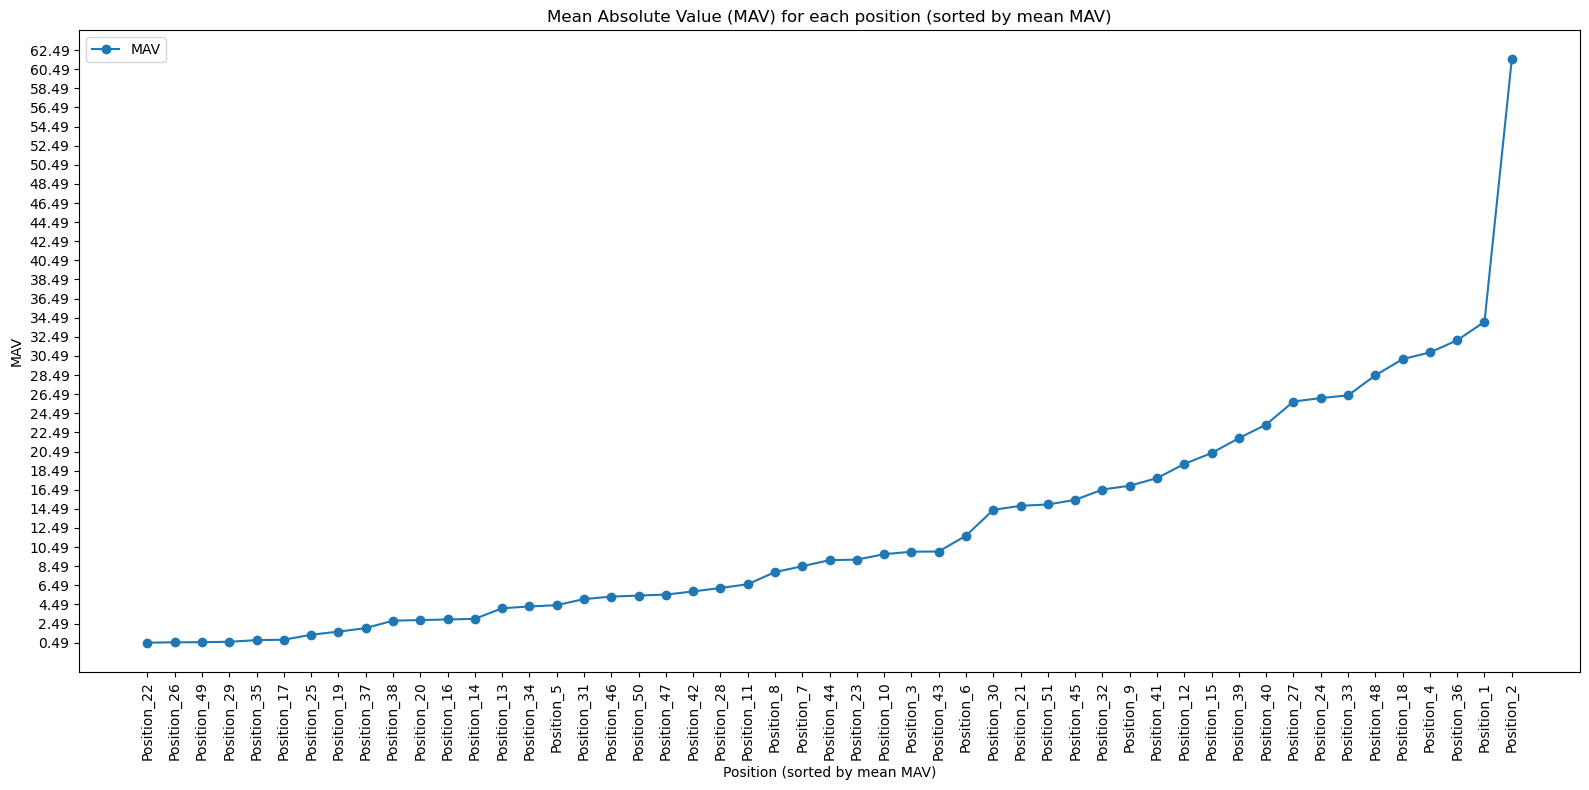

In [17]:
# Plot for each features a graph comparing the different positions
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean MAV for each position and sort them in ascending order
mean_mav = {key: y_features[key]['MAV'] for key in y_features.keys()}
sorted_positions = sorted(mean_mav, key=mean_mav.get)

# Plot the MAV for each position in ascending order of mean MAV
plt.figure(figsize=(16, 8))  # Increase the figure size for better visibility
plt.title('Mean Absolute Value (MAV) for each position (sorted by mean MAV)')
plt.plot(sorted_positions, [mean_mav[pos] for pos in sorted_positions], marker='o', linestyle='-', label='MAV')
plt.xlabel('Position (sorted by mean MAV)')
plt.ylabel('MAV')
plt.xticks(rotation=90)
plt.yticks(np.arange(min(mean_mav.values()), max(mean_mav.values()) + 1, 2))  # Reduce the number of graduations on the y-axis
plt.legend()
plt.tight_layout()
plt.show()
# Plot the Variance for each position
# Calculate the variance for each position and sort them in ascending order
variance_values = {key: y_features[key]['Variance'] for key in y_features.keys()}
sorted_positions_variance = sorted(variance_values, key=variance_values.get)


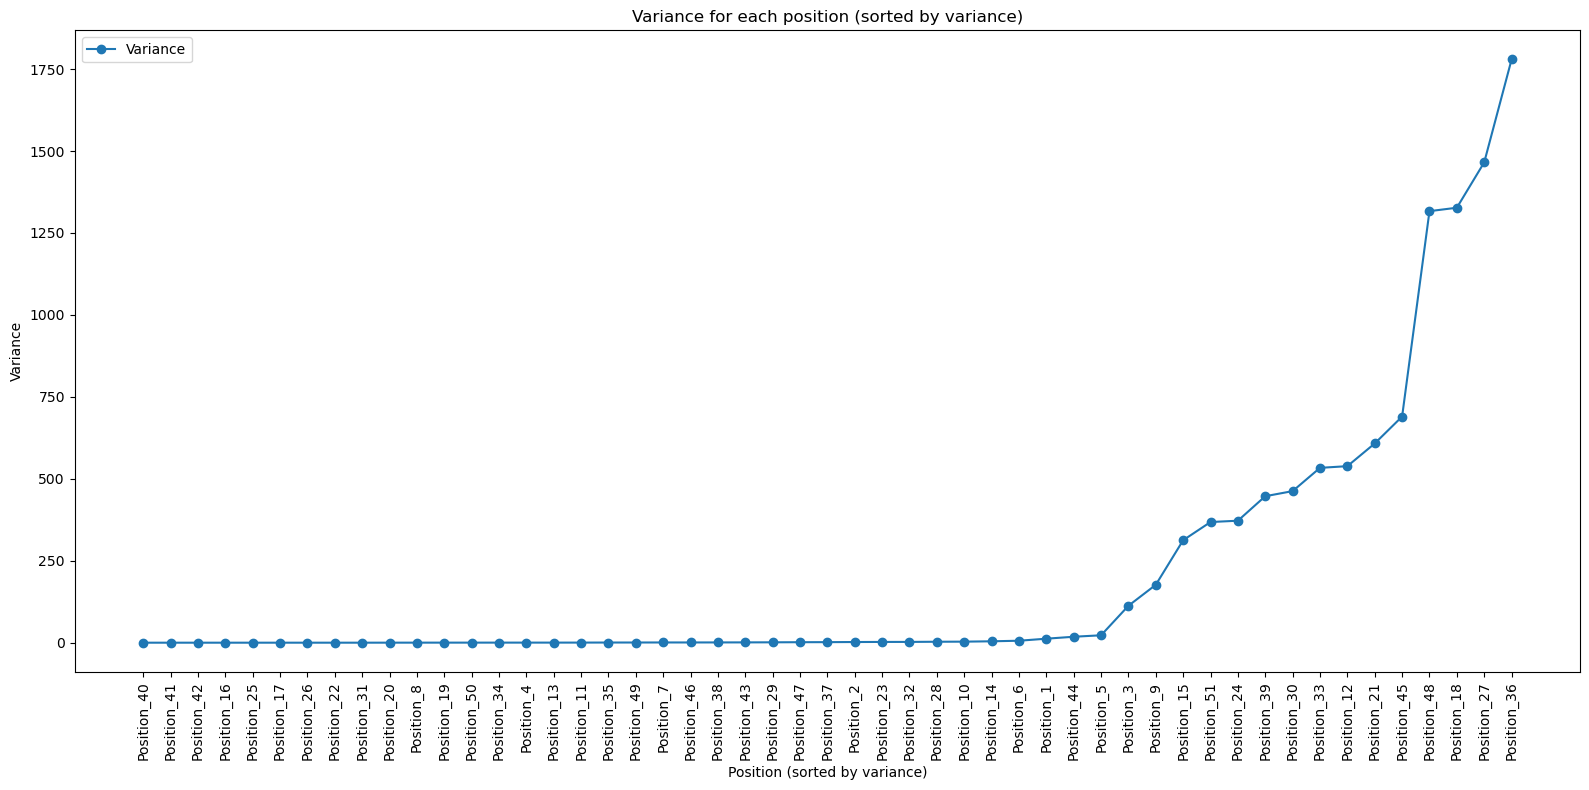

In [18]:

# Plot the Variance for each position in ascending order of variance
plt.figure(figsize=(16, 8))  # Increase the figure size for better visibility
plt.title('Variance for each position (sorted by variance)')
plt.plot(sorted_positions_variance, [variance_values[pos] for pos in sorted_positions_variance], marker='o', linestyle='-', label='Variance')
plt.xlabel('Position (sorted by variance)')
plt.ylabel('Variance')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()




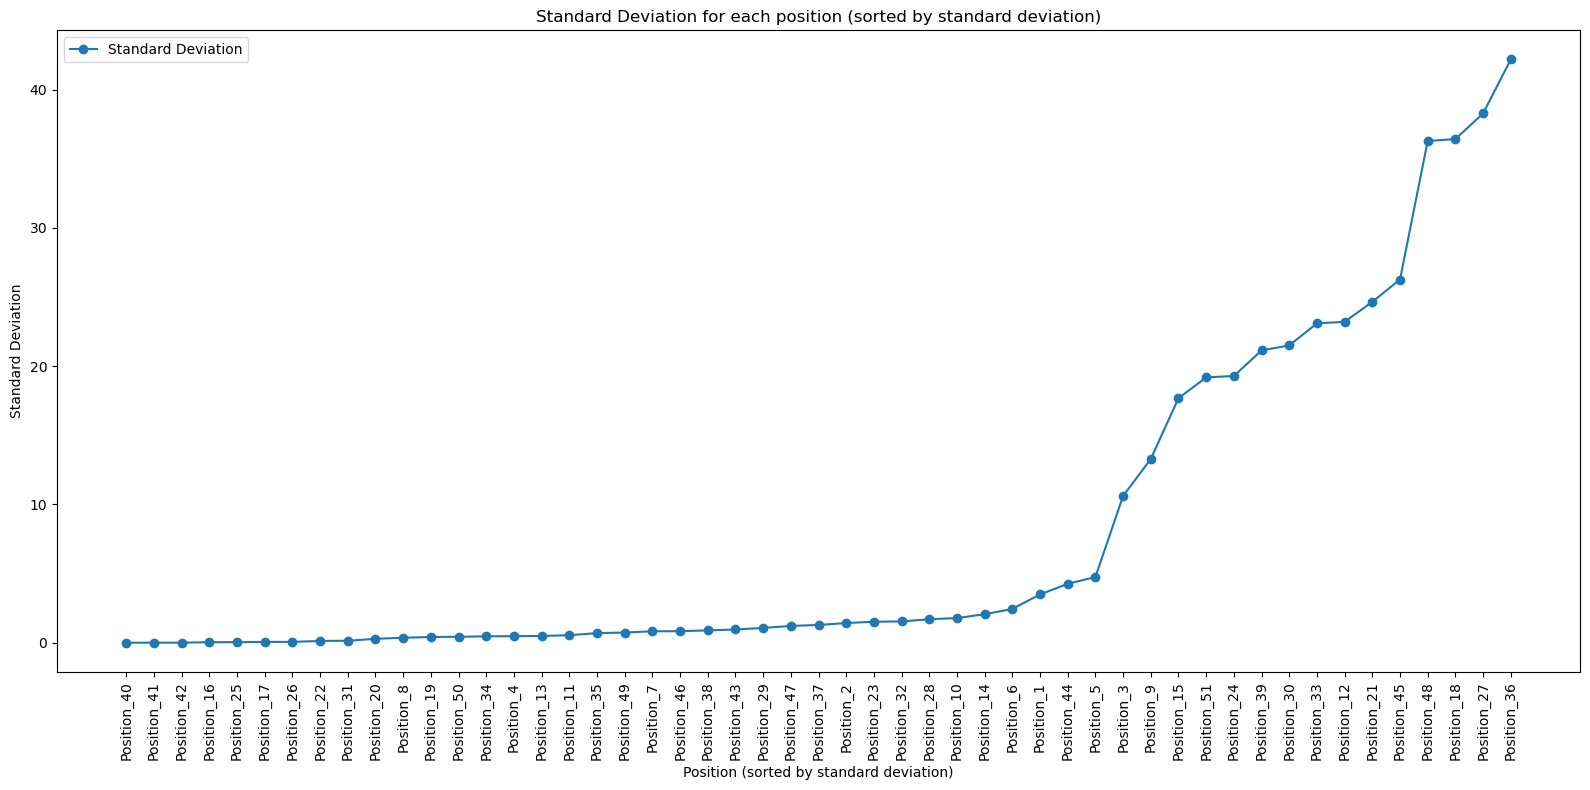

In [19]:
# Plot the standard deviation for each position in ascending order of standard deviation
plt.figure(figsize=(16, 8))  # Increase the figure size for better visibility
plt.title('Standard Deviation for each position (sorted by standard deviation)')
plt.plot(sorted_positions_variance, [y_features[pos]['Standard_Deviation'] for pos in sorted_positions_variance], marker='o', linestyle='-', label='Standard Deviation')
plt.xlabel('Position (sorted by standard deviation)')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


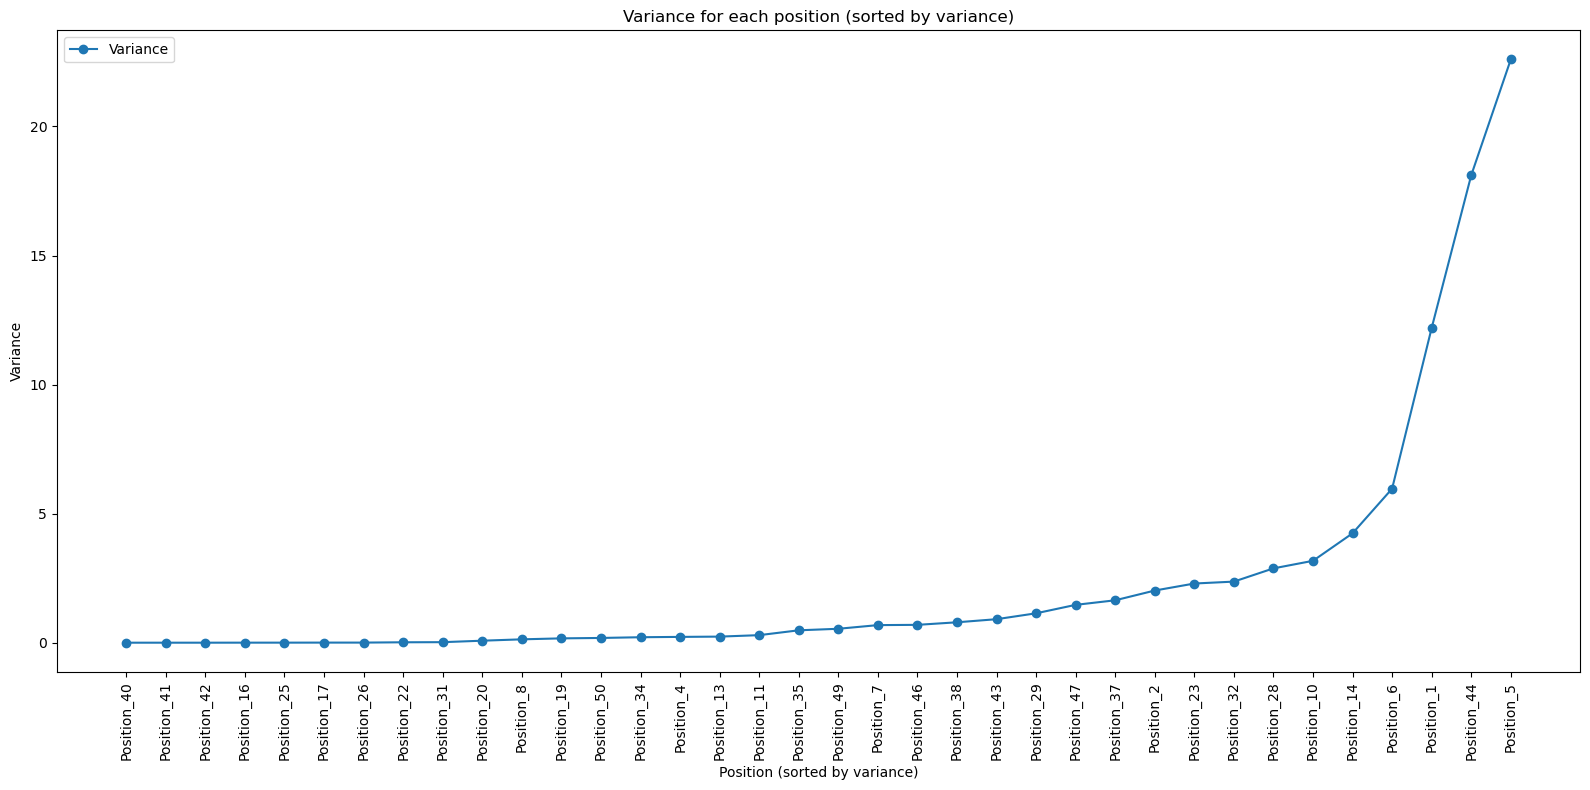

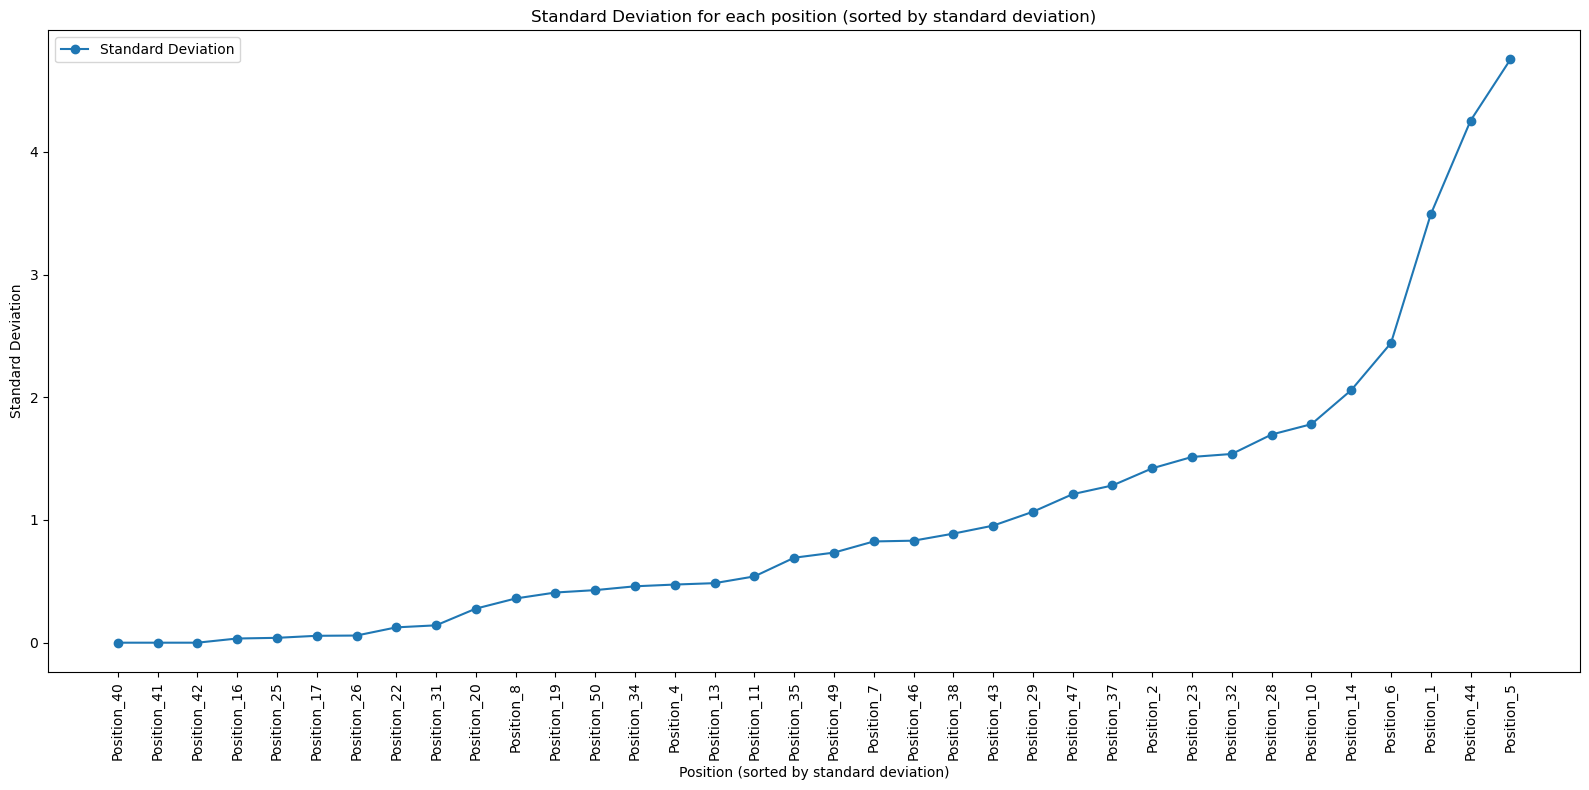

In [20]:
# Plot the 36 lowest Variance in ascending order of variance
plt.figure(figsize=(16, 8))  # Increase the figure size for better visibility
plt.title('Variance for each position (sorted by variance)')
plt.plot(sorted_positions_variance[:36], [variance_values[pos] for pos in sorted_positions_variance[:36]], marker='o', linestyle='-', label='Variance')
plt.xlabel('Position (sorted by variance)')
plt.ylabel('Variance')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the 36 lowest standard deviation in ascending order of standard deviation
plt.figure(figsize=(16, 8))  # Increase the figure size for better visibility
plt.title('Standard Deviation for each position (sorted by standard deviation)')
plt.plot(sorted_positions_variance[:36], [y_features[pos]['Standard_Deviation'] for pos in sorted_positions_variance[:36]], marker='o', linestyle='-', label='Standard Deviation')
plt.xlabel('Position (sorted by standard deviation)')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Display the value of the 10 lowest variance and standard deviation
for i in range(10):
    print(f"Position {sorted_positions_variance[i]}: Variance = {variance_values[sorted_positions_variance[i]]}, Standard Deviation = {y_features[sorted_positions_variance[i]]['Standard_Deviation']}")    

Position Position_40: Variance = 0.0, Standard Deviation = 0.0
Position Position_41: Variance = 0.0, Standard Deviation = 0.0
Position Position_42: Variance = 0.0, Standard Deviation = 0.0
Position Position_16: Variance = 0.0011615014645875218, Standard Deviation = 0.03408080786289436
Position Position_25: Variance = 0.0015642464983905958, Standard Deviation = 0.03955055623364349
Position Position_17: Variance = 0.003159196932885782, Standard Deviation = 0.056206733874917356
Position Position_26: Variance = 0.003384056728525797, Standard Deviation = 0.05817264587867563
Position Position_22: Variance = 0.015599986584305702, Standard Deviation = 0.12489990626219742
Position Position_31: Variance = 0.020022928117845718, Standard Deviation = 0.14150239615584506
Position Position_20: Variance = 0.07713272853097808, Standard Deviation = 0.2777277957478835


In [22]:
# Get rid of the columns with a very low variance
y_train = y_train.loc[:, Y_df.var() > 0.01]  # Keep only columns with variance greater than 0.1
# Get rid of the same columns in the test set
y_test = y_test.loc[:, y_train.columns]  # Keep only the columns that are in the training set

# Position 2 seems to be an outlier having a high mean and low variance
y_train = y_train.drop(columns=['Position_2'])  # Drop the outlier column
y_test = y_test.drop(columns=['Position_2'])  # Drop the outlier column in the test set

In [23]:
# Print the new shape of y_train
print("New shape of y_train:", y_train.shape)
print("New shape of y_test:", y_test.shape)  # Print the new shape of y_test

New shape of y_train: (6506, 43)
New shape of y_test: (2169, 43)


### Analysis of the y data

In [24]:
#pip install mrmr_selection

In [25]:
from mrmr import mrmr_regression

best_features = {}
for i in range(1, len(y_train.columns)):
    # Select the features for the current position
    y_train_position = y_train.iloc[:, i-1]  # Select the i-th position column
    #print(y_train_position)
    # Perform MRMR feature selection
    selected_features = mrmr_regression(X_train, y_train_position, K=20)  # Select top 20 features
    #print(f"Selected features for position {i}: {selected_features}")
    best_features[i] = selected_features
 

100%|██████████| 20/20 [00:01<00:00, 13.33it/s]


In [26]:
# Select the best 20 features overall positions
best_features_overall = {}
for i in range(1, len(y_train.columns)):
    if i in best_features:  # Ensure the key exists in best_features
        for j in range(min(20, len(best_features[i]))):  # Ensure j is within bounds
            if best_features[i][j] not in best_features_overall.keys():
                best_features_overall[best_features[i][j]] = 0
            best_features_overall[best_features[i][j]] += 20 - j 
# Sort the features based on their scores
sorted_features = sorted(best_features_overall.items(), key=lambda x: x[1], reverse=True)
# Select the top 20 features
top_20_features = [feature[0] for feature in sorted_features[:20]]
print("Top 20 features selected by MRMR:")
for feature in top_20_features:
    print(feature)

Top 20 features selected by MRMR:
Myopulse_Percentage_EMG_5
Waveform_Length_EMG_5
MAV_EMG_5
Myopulse_Percentage_EMG_2
MAV_EMG_7
Waveform_Length_EMG_7
Skewness_EMG_2
RMS_EMG_5
RMS_EMG_7
Skewness_EMG_5
Standard_Deviation_EMG_5
Standard_Deviation_EMG_7
Median_Frequency_EMG_4
Median_Frequency_EMG_2
Zero_Crossing_Rate_EMG_4
Willison_Amplitude_EMG_2
RMS_EMG_1
Myopulse_Percentage_EMG_1
MAV_EMG_1
Standard_Deviation_EMG_1


In [27]:
# Print sorted features and their scores
print("Sorted features and their scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score}")

Sorted features and their scores:
Myopulse_Percentage_EMG_5: 720
Waveform_Length_EMG_5: 565
MAV_EMG_5: 533
Myopulse_Percentage_EMG_2: 480
MAV_EMG_7: 446
Waveform_Length_EMG_7: 437
Skewness_EMG_2: 437
RMS_EMG_5: 421
RMS_EMG_7: 361
Skewness_EMG_5: 356
Standard_Deviation_EMG_5: 344
Standard_Deviation_EMG_7: 315
Median_Frequency_EMG_4: 307
Median_Frequency_EMG_2: 300
Zero_Crossing_Rate_EMG_4: 271
Willison_Amplitude_EMG_2: 251
RMS_EMG_1: 205
Myopulse_Percentage_EMG_1: 168
MAV_EMG_1: 137
Standard_Deviation_EMG_1: 125
Skewness_EMG_6: 115
Variance_EMG_7: 108
Median_Frequency_EMG_1: 101
Variance_EMG_1: 92
Skewness_EMG_3: 86
Waveform_Length_EMG_1: 74
Median_Frequency_EMG_8: 69
MAV_EMG_2: 69
Myopulse_Percentage_EMG_7: 62
Zero_Crossing_Rate_EMG_2: 61
Waveform_Length_EMG_6: 58
Zero_Crossing_Rate_EMG_3: 54
Mean_Frequency_EMG_1: 50
Myopulse_Percentage_EMG_4: 46
Waveform_Length_EMG_2: 45
Variance_EMG_5: 44
Myopulse_Percentage_EMG_6: 44
Median_Frequency_EMG_7: 44
Skewness_EMG_1: 40
Waveform_Length_EMG_

In [28]:
X_train_fs = X_train[top_20_features]
X_test_fs = X_test[top_20_features]
print("X_train_fs shape:", X_train_fs.shape)
print("X_test_fs shape:", X_test_fs.shape)


X_train_fs shape: (6506, 20)
X_test_fs shape: (2169, 20)


In [29]:
def mse(y, y_hat):
    return np.mean((y-y_hat)**2)

def nmse(y, y_hat):
    return np.mean((y-y_hat)**2)/np.std(y)**2

In [30]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
# Let scale the data to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits=5, shuffle=True, random_state=0)
CV_errors = []
n_estimators = 100
for train_index, test_index in kf.split(X_train):
    X_train_f, X_test_f = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_f, Y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]
    # Scale the data
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42).fit(X_train_f, Y_train_f)
    
    # Predict the test set
    Y_hat = model.predict(X_test_f)

    CV_errors.append(nmse(Y_test_f, Y_hat))
print ("Cross-Validation NMSE:", np.mean(CV_errors))

Cross-Validation NMSE: 477.3713434790315


In [31]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
# Let scale the data to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits=5, shuffle=True, random_state=0)
CV_errors = []
n_estimators = 100
for train_index, test_index in kf.split(X_train_fs):
    X_train_f, X_test_f = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_f, Y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]
    # Scale the data
    scaler = StandardScaler()
    X_train_f = scaler.fit_transform(X_train_f)
    X_test_f = scaler.transform(X_test_f)
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42).fit(X_train_f, Y_train_f)
    
    # Predict the test set
    Y_hat = model.predict(X_test_f)

    CV_errors.append(nmse(Y_test_f, Y_hat))
print ("Cross-Validation NMSE:", np.mean(CV_errors))

Cross-Validation NMSE: 477.4623652071966


In [32]:
model = RandomForestRegressor(n_estimators=n_estimators, random_state=42).fit(X_train_fs, y_train)
Y_hat = model.predict(X_test_fs)
# Since y_train was scaled using StandardScaler, we need to inverse transform the predictions

empirical_mse = nmse(y_test, Y_hat)
print("Empirical NMSE:", empirical_mse.mean())

Empirical NMSE: 509.7848362043922


In [33]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
# Let scale the data to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=20, shuffle=True, random_state=0)
CV_errors = []
n_estimators = 100
for train_index, test_index in kf.split(X_train_fs):
    X_train_f, X_test_f = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_f, Y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]
    scaler = StandardScaler()
    X_train_f = scaler.fit_transform(X_train_f)
    X_test_f = scaler.transform(X_test_f)
    model = LinearRegression().fit(X_train_f, Y_train_f)
    
    # Predict the test set
    Y_hat = model.predict(X_test_f)

    CV_errors.append(nmse(Y_test_f, Y_hat))
print ("Cross-Validation NMSE:", np.mean(CV_errors))

Cross-Validation NMSE: 740.3070878340584


In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
Y_hat = model.predict(X_test)

empirical_mse = nmse(y_test, Y_hat)
print("Empirical NMSE:", empirical_mse.mean())


Empirical NMSE: 709.9024672542208


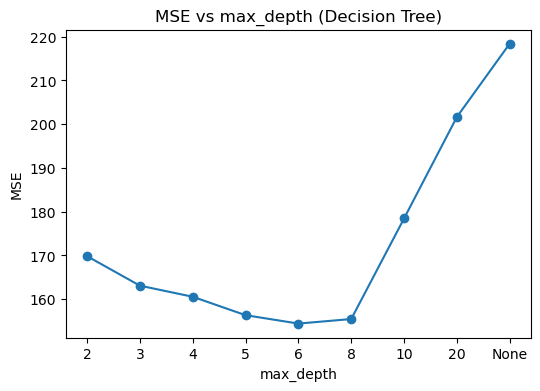

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

depths = [2, 3, 4, 5, 6, 8, 10, 20, None]
mse_values_tree = []

for d in depths:
    dt = DecisionTreeRegressor(max_depth=d, random_state=42)
    dt.fit(X_train_final, y_train_final)
    y_pred_dt = dt.predict(X_val)
    mse_values_tree.append(mse(y_val, y_pred_dt))

plt.figure(figsize=(6,4))
plt.plot([str(d) for d in depths], mse_values_tree, marker='o')
plt.title("MSE vs max_depth (Decision Tree)")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.show()

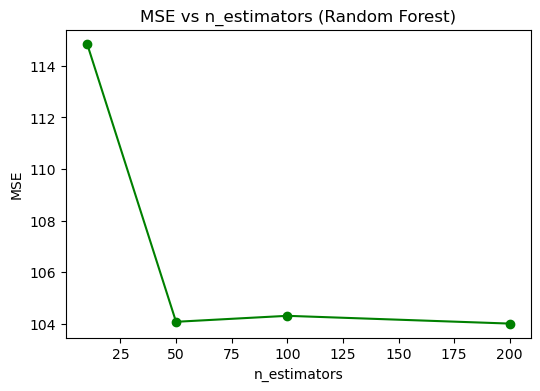

In [36]:
estimators_range = [10, 50, 100, 200]
mse_values_rf = []

for n in estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train_final, y_train_final)
    y_pred_rf = rf.predict(X_val)
    mse_values_rf.append(mse(y_val, y_pred_rf))

plt.figure(figsize=(6,4))
plt.plot(estimators_range, mse_values_rf, marker='o', color='green')
plt.title("MSE vs n_estimators (Random Forest)")
plt.xlabel("n_estimators")
plt.ylabel("MSE")
plt.show()

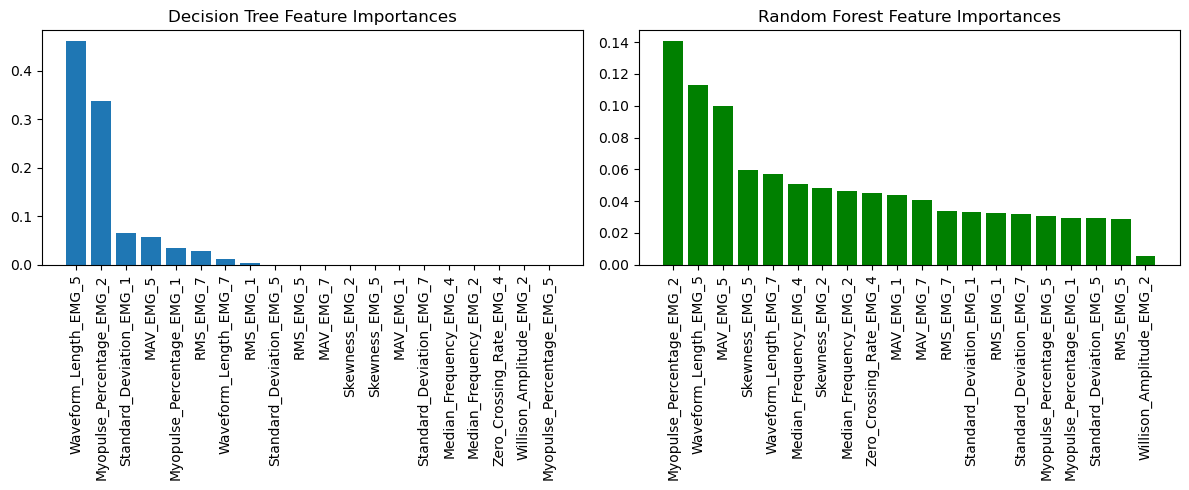

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# User-chosen parameters (edit based on the results of section 4.3)
max_depth = 4     # for the Decision Tree
n_estimators = 100 # for the Random Forest

# Instantiate and fit the best Decision Tree
best_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
best_tree.fit(X_train_fs, y_train)

# Instantiate and fit the best Random Forest
best_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
best_forest.fit(X_train_fs, y_train)

feature_names = X_train_fs.columns  # Using original column names

tree_importances = best_tree.feature_importances_
forest_importances = best_forest.feature_importances_

# Sort features by importance for each model
tree_sorted_idx = np.argsort(tree_importances)[::-1]
forest_sorted_idx = np.argsort(forest_importances)[::-1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Decision Tree Feature Importances")
plt.bar(range(len(tree_importances)), tree_importances[tree_sorted_idx], align='center')
plt.xticks(range(len(tree_importances)), feature_names[tree_sorted_idx], rotation=90)

plt.subplot(1, 2, 2)
plt.title("Random Forest Feature Importances")
plt.bar(range(len(forest_importances)), forest_importances[forest_sorted_idx], align='center', color='green')
plt.xticks(range(len(forest_importances)), feature_names[forest_sorted_idx], rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# User-chosen parameters (edit based on the results of section 4.3)
max_depth = 4     # for the Decision Tree
n_estimators = 100 # for the Random Forest

# Instantiate and fit the best Decision Tree
best_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Instantiate and fit the best Random Forest
best_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
best_forest.fit(X_train, y_train)

feature_names = X_train.columns  # Using original column names

tree_importances = best_tree.feature_importances_
forest_importances = best_forest.feature_importances_

# Sort features by importance for each model
tree_sorted_idx = np.argsort(tree_importances)[::-1]
forest_sorted_idx = np.argsort(forest_importances)[::-1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Decision Tree Feature Importances")
plt.bar(range(len(tree_importances)), tree_importances[tree_sorted_idx], align='center')
plt.xticks(range(len(tree_importances)), feature_names[tree_sorted_idx], rotation=90)

plt.subplot(1, 2, 2)
plt.title("Random Forest Feature Importances")
plt.bar(range(len(forest_importances)), forest_importances[forest_sorted_idx], align='center', color='green')
plt.xticks(range(len(forest_importances)), feature_names[forest_sorted_idx], rotation=90)

plt.tight_layout()
plt.show()

In [39]:
top_32_features_rf = [feature_names[i] for i in forest_sorted_idx[:32]]

for i in range (len(forest_importances)):
    print(f"Feature {i}: {forest_importances[forest_sorted_idx[i]]}")
    print(f"Feature {i}: {feature_names[forest_sorted_idx[i]]}")



Feature 0: 0.07529266517180863
Feature 0: Waveform_Length_EMG_5
Feature 1: 0.06482412551922535
Feature 1: MAV_EMG_5
Feature 2: 0.06301344215017451
Feature 2: Waveform_Length_EMG_4
Feature 3: 0.050814099850040345
Feature 3: Waveform_Length_EMG_2
Feature 4: 0.016637835844682508
Feature 4: Kurtosis_EMG_5
Feature 5: 0.016047184038227327
Feature 5: Waveform_Length_EMG_3
Feature 6: 0.015986955547962384
Feature 6: Myopulse_Percentage_EMG_5
Feature 7: 0.014446209670475585
Feature 7: Skewness_EMG_6
Feature 8: 0.014187954497189193
Feature 8: Skewness_EMG_8
Feature 9: 0.013611337126631822
Feature 9: Skewness_EMG_5
Feature 10: 0.013301638904145515
Feature 10: Skewness_EMG_1
Feature 11: 0.01322963512214301
Feature 11: Waveform_Length_EMG_1
Feature 12: 0.013206241235451176
Feature 12: Kurtosis_EMG_4
Feature 13: 0.012861439776054287
Feature 13: MAV_EMG_2
Feature 14: 0.01283606420445906
Feature 14: Myopulse_Percentage_EMG_2
Feature 15: 0.012730552192430479
Feature 15: Zero_Crossing_Rate_EMG_8
Feature 

In [40]:
X_train_fs_rf = X_train[top_32_features_rf]
X_test_fs_rf = X_test[top_32_features_rf]

In [41]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
# Let scale the data to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits=10, shuffle=True, random_state=0)
CV_errors = []
n_estimators = 100
for train_index, test_index in kf.split(X_train_fs_rf):
    X_train_f, X_test_f = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_f, Y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]
    # Scale the data
    scaler = StandardScaler()
    X_train_f = scaler.fit_transform(X_train_f)
    X_test_f = scaler.transform(X_test_f)
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42).fit(X_train_f, Y_train_f)
    
    # Predict the test set
    Y_hat = model.predict(X_test_f)

    CV_errors.append(nmse(Y_test_f, Y_hat))
print ("Cross-Validation NMSE:", np.mean(CV_errors))

Cross-Validation NMSE: 460.8380685449306


In [42]:
model = RandomForestRegressor(n_estimators=n_estimators, random_state=42).fit(X_train_fs_rf, y_train)
Y_hat = model.predict(X_test_fs_rf)


empirical_mse = nmse(y_test, Y_hat)
print("Empirical NMSE:", empirical_mse.mean())


Empirical NMSE: 420.0915658933551


In [43]:
print("Empirical NMSE:", empirical_mse)

Empirical NMSE: Position_1        8.836999
Position_3        0.953707
Position_4      470.186751
Position_5        4.404849
Position_6       16.650142
Position_7      158.390516
Position_8      834.901348
Position_9        0.611014
Position_10      34.656634
Position_11     375.835103
Position_12       0.204303
Position_13     419.345938
Position_14      25.204275
Position_15       0.325293
Position_18       0.078246
Position_19     617.829201
Position_20    1314.559463
Position_21       0.168933
Position_22    6503.572954
Position_23      42.745972
Position_24       0.278786
Position_27       0.071098
Position_28      36.381202
Position_29      90.826383
Position_30       0.225511
Position_31    5031.971046
Position_32      43.892670
Position_33       0.199510
Position_34     504.685804
Position_35     222.890547
Position_36       0.060075
Position_37      64.288265
Position_38     131.016308
Position_39       0.234384
Position_43     122.280774
Position_44       5.898778
Position_45 

In [46]:
print(top_32_features_rf)
print(top_20_features)

# Compare the two feature sets and print the differences
only_in_rf = set(top_32_features_rf) - set(top_20_features)
only_in_mrmr = set(top_20_features) - set(top_32_features_rf)
print("Features only in Random Forest:", only_in_rf)
print("Features only in MRMR:", only_in_mrmr)


['Waveform_Length_EMG_5', 'MAV_EMG_5', 'Waveform_Length_EMG_4', 'Waveform_Length_EMG_2', 'Kurtosis_EMG_5', 'Waveform_Length_EMG_3', 'Myopulse_Percentage_EMG_5', 'Skewness_EMG_6', 'Skewness_EMG_8', 'Skewness_EMG_5', 'Skewness_EMG_1', 'Waveform_Length_EMG_1', 'Kurtosis_EMG_4', 'MAV_EMG_2', 'Myopulse_Percentage_EMG_2', 'Zero_Crossing_Rate_EMG_8', 'Waveform_Length_EMG_7', 'Median_Frequency_EMG_6', 'Waveform_Length_EMG_6', 'Myopulse_Percentage_EMG_8', 'Waveform_Length_EMG_8', 'Kurtosis_EMG_6', 'Kurtosis_EMG_7', 'Kurtosis_EMG_8', 'MAV_EMG_1', 'Zero_Crossing_Rate_EMG_6', 'Skewness_EMG_7', 'Skewness_EMG_3', 'Zero_Crossing_Rate_EMG_5', 'Zero_Crossing_Rate_EMG_2', 'Kurtosis_EMG_1', 'Median_Frequency_EMG_4']
['Myopulse_Percentage_EMG_5', 'Waveform_Length_EMG_5', 'MAV_EMG_5', 'Myopulse_Percentage_EMG_2', 'MAV_EMG_7', 'Waveform_Length_EMG_7', 'Skewness_EMG_2', 'RMS_EMG_5', 'RMS_EMG_7', 'Skewness_EMG_5', 'Standard_Deviation_EMG_5', 'Standard_Deviation_EMG_7', 'Median_Frequency_EMG_4', 'Median_Freque